<a href="https://colab.research.google.com/github/virsalee27/UTS_PCD/blob/main/Copy_of_UTS_2206103_D_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Histogram Citra

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


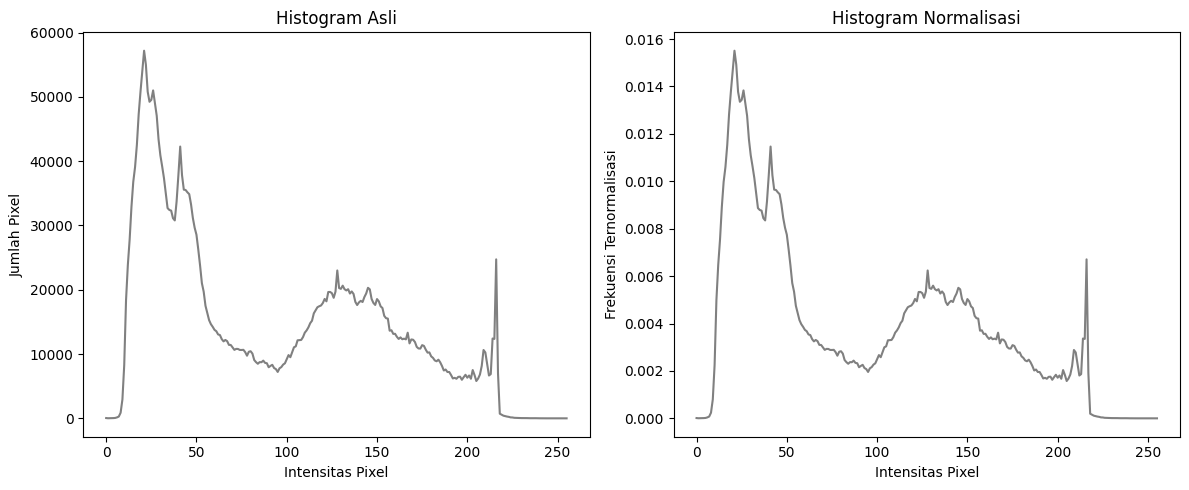

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/tugas pcd/wallpaperflare.com_wallpaper (10).jpg', cv2.IMREAD_GRAYSCALE)

# Mengecek apakah gambar berhasil dibaca
if image is None:
    print("/content/drive/MyDrive/tugas pcd/wallpaperflare.com_wallpaper (10).jpg")
else:
    # Menghitung histogram dari gambar
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Normalisasi histogram
    histogram_normalized = histogram / histogram.sum()

    # Menampilkan histogram asli
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(histogram, color='gray')
    plt.title('Histogram Asli')
    plt.xlabel('Intensitas Pixel')
    plt.ylabel('Jumlah Pixel')

    # Menampilkan histogram yang sudah dinormalisasi
    plt.subplot(1, 2, 2)
    plt.plot(histogram_normalized, color='gray')
    plt.title('Histogram Normalisasi')
    plt.xlabel('Intensitas Pixel')
    plt.ylabel('Frekuensi Ternormalisasi')

    # Menampilkan hasil
    plt.tight_layout()
    plt.show()


2. Operasi Konvolusi dengan Kernel Sederhana.

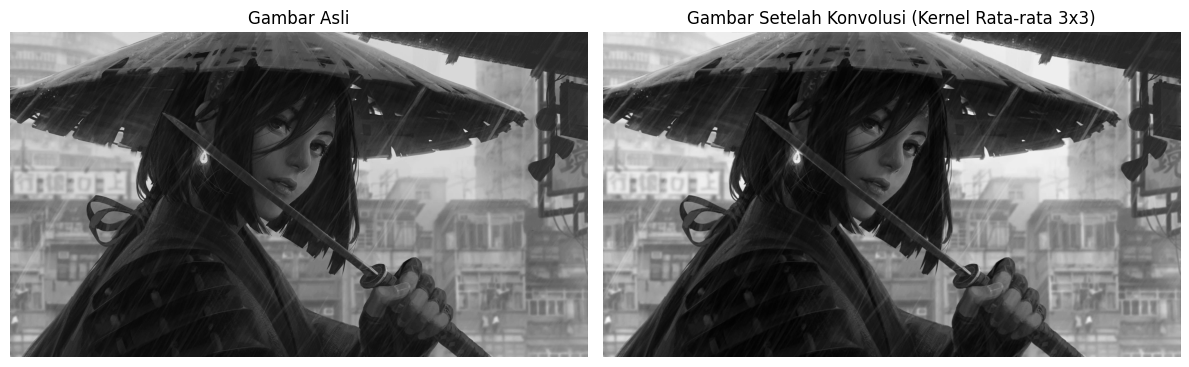

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/tugas pcd/wallpaperflare.com_wallpaper (10).jpg', cv2.IMREAD_GRAYSCALE)

# Mengecek apakah gambar berhasil dibaca
if image is None:
    print("/content/drive/MyDrive/tugas pcd/wallpaperflare.com_wallpaper (10).jpg")
else:
    # Membuat kernel rata-rata 3x3
    kernel = np.ones((3, 3), np.float32) / 9

    # Melakukan konvolusi dengan kernel rata-rata
    image_convolved = cv2.filter2D(image, -1, kernel)

    # Menampilkan gambar asli dan hasil konvolusi
    plt.figure(figsize=(12, 5))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Gambar Asli')
    plt.axis('off')

    # Gambar setelah konvolusi
    plt.subplot(1, 2, 2)
    plt.imshow(image_convolved, cmap='gray')
    plt.title('Gambar Setelah Konvolusi (Kernel Rata-rata 3x3)')
    plt.axis('off')

    # efek yg terjai setelah konvolusi menggunakan kernel rata-rata 3×3, gambar menjadi lebih halus atau blurred. Efek ini disebabkan oleh kernel rata-rata, yang menggantikan setiap piksel dengan rata-rata dari piksel-piksel sekitarnya. Konvolusi ini membantu mengurangi detail halus dan noise pada gambar. Hasilnya, tepi objek pada gambar akan sedikit kehilangan ketajaman, tetapi tekstur yang halus atau noise dapat berkurang.

    plt.tight_layout()
    plt.show()


3. Transformasi Fourier

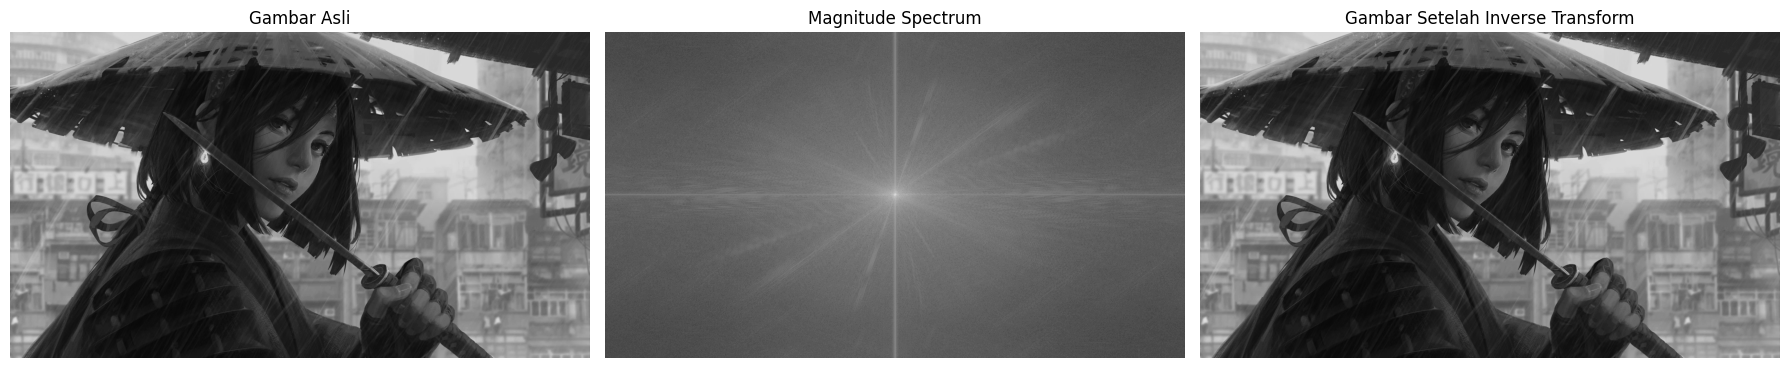

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/tugas pcd/wallpaperflare.com_wallpaper (10).jpg', cv2.IMREAD_GRAYSCALE)

# Mengecek apakah gambar berhasil dibaca
if image is None:
    print("/content/drive/MyDrive/tugas pcd/wallpaperflare.com_wallpaper (10).jpg")
else:
    # Melakukan Transformasi Fourier
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Menghitung Magnitude Spectrum
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

    # Melakukan Inverse Transform
    f_ishift = np.fft.ifftshift(dft_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    # Menampilkan Gambar Asli, Magnitude Spectrum, dan Hasil Inverse Transform
    plt.figure(figsize=(18, 6))

    # Gambar asli
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Gambar Asli')
    plt.axis('off')

    # Magnitude Spectrum
    plt.subplot(1, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off')

    # Hasil Inverse Transform
    plt.subplot(1, 3, 3)
    plt.imshow(img_back, cmap='gray')
    plt.title('Gambar Setelah Inverse Transform')
    plt.axis('off')

    # informasi yang diperoleh :
    # 1. Magnitude Spectrum menunjukkan distribusi frekuensi dalam gambar. Frekuensi rendah terletak di tengah, dan frekuensi tinggi berada di bagian tepi.
    # 2. Area terang di tengah spectrum menunjukkan frekuensi rendah yang dominan, yang bertanggung jawab untuk fitur-fitur besar dalam gambar (kontur besar dan gradien lambat).
    # 3. Frekuensi tinggi, yang terletak di tepi, merepresentasikan detail halus dan tekstur. Jika gambar memiliki banyak tepi atau noise, maka frekuensi tinggi akan lebih menonjol dalam spektrum.

    plt.tight_layout()
    plt.show()


4. Operasi Aritmatika Citra

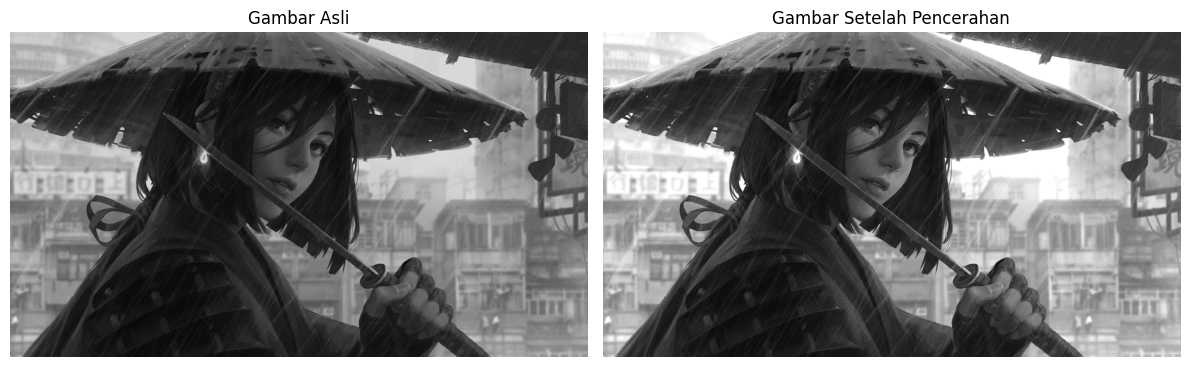

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/tugas pcd/wallpaperflare.com_wallpaper (10).jpg', cv2.IMREAD_GRAYSCALE)

# Mengecek apakah gambar berhasil dibaca
if image is None:
    print("/content/drive/MyDrive/tugas pcd/wallpaperflare.com_wallpaper (10).jpg")
else:
    # Menentukan nilai konstanta untuk pencerahan
    brightness_increase = 50

    # Menerapkan operasi pencerahan dengan menambahkan konstanta
    brightened_image = cv2.add(image, brightness_increase)

    # Menampilkan gambar asli dan gambar yang telah dicerahkan
    plt.figure(figsize=(12, 5))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Gambar Asli')
    plt.axis('off')

    # Gambar setelah pencerahan
    plt.subplot(1, 2, 2)
    plt.imshow(brightened_image, cmap='gray')
    plt.title('Gambar Setelah Pencerahan')
    plt.axis('off')

    # Perubahan yang Terjadi pada Citra Setelah Pencerahan
    # 1. Setelah penambahan konstanta, seluruh piksel dalam gambar menjadi lebih terang, sehingga detail yang mungkin tidak terlalu jelas pada gambar asli menjadi lebih terlihat.
    # 2. Bagian terang pada gambar akan lebih mendominasi, dan area gelap akan menjadi lebih terang, tetapi dengan batas nilai maksimum pada 255, area yang sudah sangat terang mungkin akan terlihat "putih penuh" karena nilai pikselnya mencapai batas maksimum.
    # 3. Secara keseluruhan, gambar menjadi lebih cerah, dan kontras antara area terang dan gelap sedikit berkurang karena semua piksel meningkat secara proporsional.

    plt.tight_layout()
    plt.show()
